# **Milestone 2 Phase 1**

# **I. Introduction**

Nama : Muhammad Farhan Darmawan

Batch : RMT 019

## Objective :

Problem Statement :

Predict quality of milk using machine learning method which using supervised learning such as Logistic Regression, Support Vector Machine, Decisiont Tree, Random Forest, AdaBoost, and CatBoost

Latar Belakang :

PT. Susu Jaya Abadi, Indonesia's largest milk company, seeks to predict the quality of sampled milk using machine learning. By analyzing historical data, we aim to develop a model that accurately classifies milk samples as low, moderate, or high quality. This predictive modeling approach will enhance quality control processes and ensure customer satisfaction, contributing to the company's success

# **II. Import Libraries**

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer #Outlier / Missing Value
from sklearn.preprocessing import MinMaxScaler
from feature_engine.outliers import Winsorizer # Caping Missing Value
from sklearn.compose import ColumnTransformer

# Correlation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from scipy.stats import chi2_contingency

# Model
# Liniear regression & Logistic Regression
from sklearn.linear_model import LogisticRegression
# Support Vector Machine
from sklearn.svm import SVC
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
# KNN
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
# Decision Tree & Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Adaboost
from sklearn.ensemble import AdaBoostClassifier
# CatBoost
from catboost import CatBoostClassifier
# GridsearchCV & Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Evaluasi
# Classification
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix, f1_score, roc_curve, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score 

# Save Model
import joblib
import pickle
import json

import warnings
warnings.filterwarnings("ignore")

# **III. Data Loading**

In [2]:
data = pd.read_csv('milknew.csv')
pd.set_option('display.max_columns', None)

In [3]:
# Show 10 upper data
data.head(10)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
5,6.6,37,1,1,1,1,255,high
6,5.5,45,1,0,1,1,250,low
7,4.5,60,0,1,1,1,250,low
8,8.1,66,1,0,1,1,255,low
9,6.7,45,1,1,0,0,247,medium


In [4]:
# Show 10 lower data
data.tail(10)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1049,6.5,37,0,0,0,0,255,medium
1050,6.6,37,1,1,1,1,255,high
1051,5.5,45,1,0,1,1,250,low
1052,6.5,40,1,0,0,0,250,medium
1053,8.1,66,1,0,1,1,255,low
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [5]:
# Show information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [6]:
# Show shape of data
data.shape

(1059, 8)

# **V. Exploratory Data Analysis**

In [7]:
# Show statistical of data
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


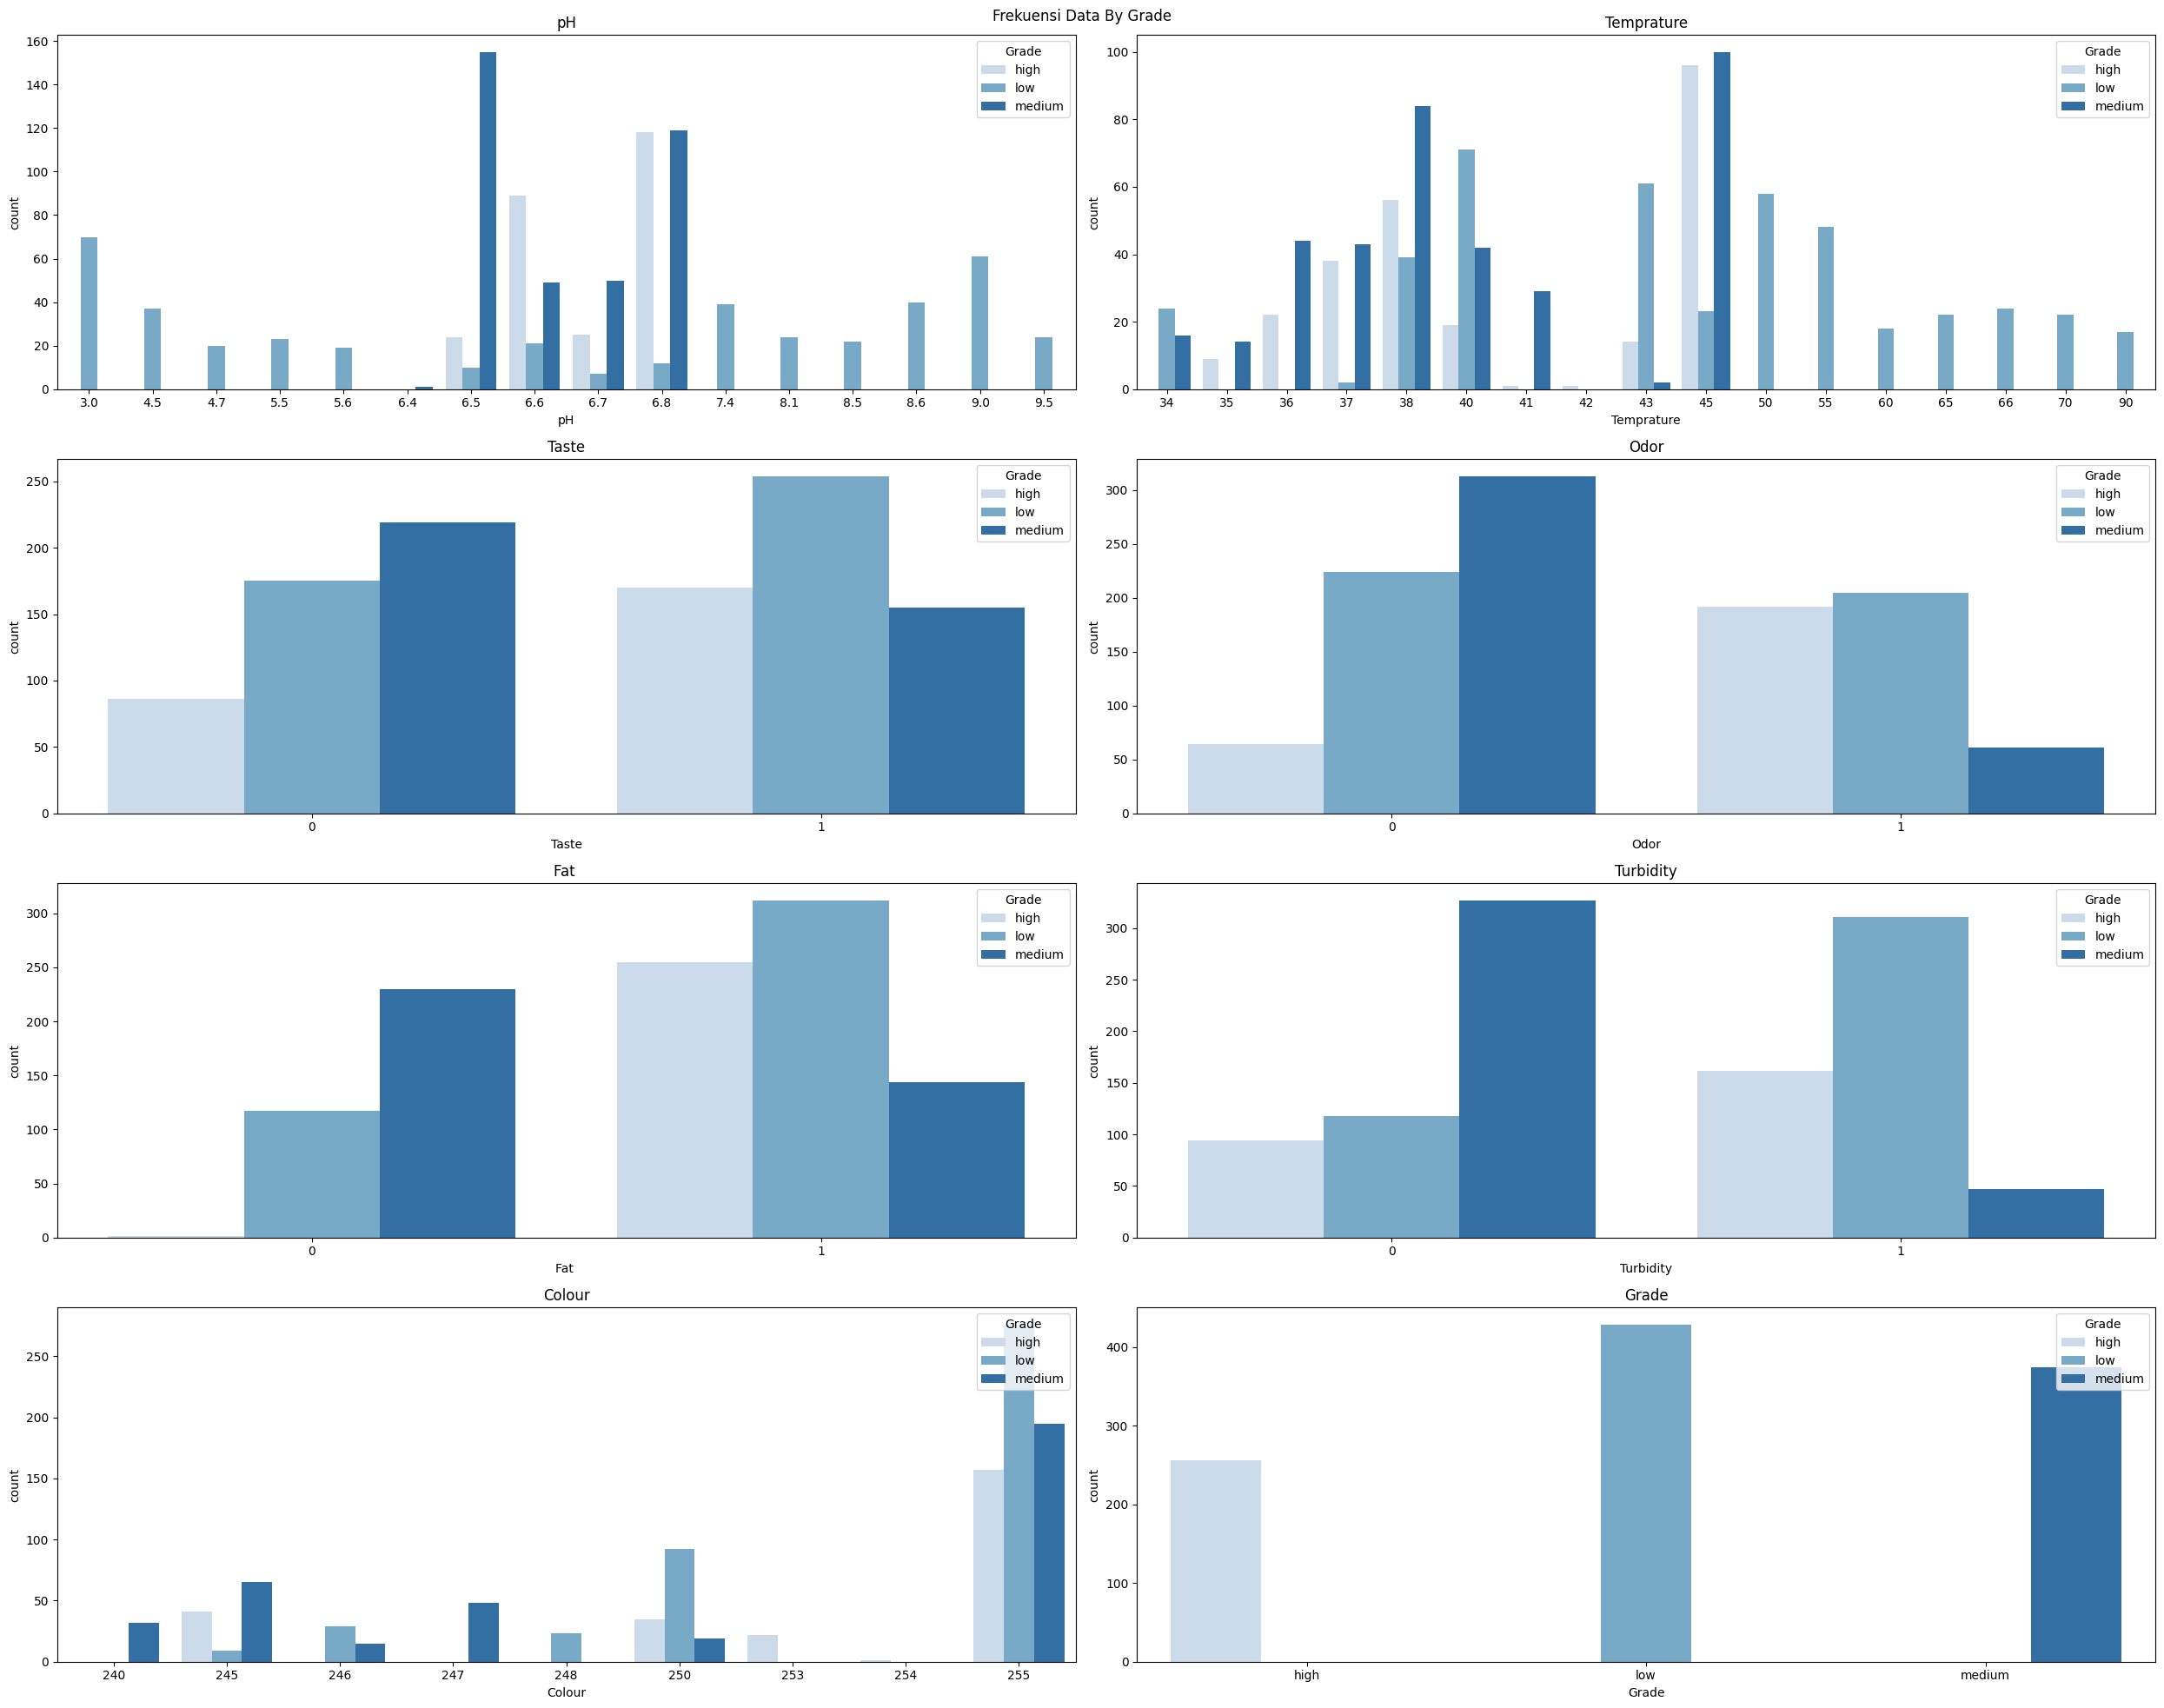

In [8]:
# column name
cols = ['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour', 'Grade']

# subplot
f, axes = plt.subplots(4, 2, figsize=(25, 20), facecolor='white')
f.suptitle('Frekuensi Data By Grade')

# use looping
for i, column in enumerate(cols):
    row = i // 2  # Nomor baris subplot
    col = i % 2   # Nomor kolom subplot
    
    # Show countplot
    ax = sns.countplot(x=column, hue='Grade', data=data[cols], palette='Blues', ax=axes[row, col])
    ax.set_title(column)
    ax.legend(title='Grade', loc='upper right')

# Menampilkan plot
plt.tight_layout()
plt.show()



Based on the provided information, PT. Susu Jaya Abadi's milk production currently falls short, with 40% of the samples being of low quality, 35% moderate, and only 25% high quality. To improve production, the product management team can focus on optimizing certain parameters: pH, temperature, color, odor, fat, taste, and turbidity.

For milk of medium-good quality, it should have a pH between 6.5 and 7.0, a temperature above 35 and less than or equal to 50. Any values outside this range would indicate low-quality milk. Additionally, the milk's color should be at 255.

To achieve good-quality milk, the team should consider factors such as fat content, odor, taste, and turbidity.

By optimizing the production process based on these parameters and implementing a monitoring system, PT. Susu Jaya Abadi can aim to consistently produce high-grade milk. This approach will ensure that the company delivers milk products of superior quality and enhances customer satisfaction.

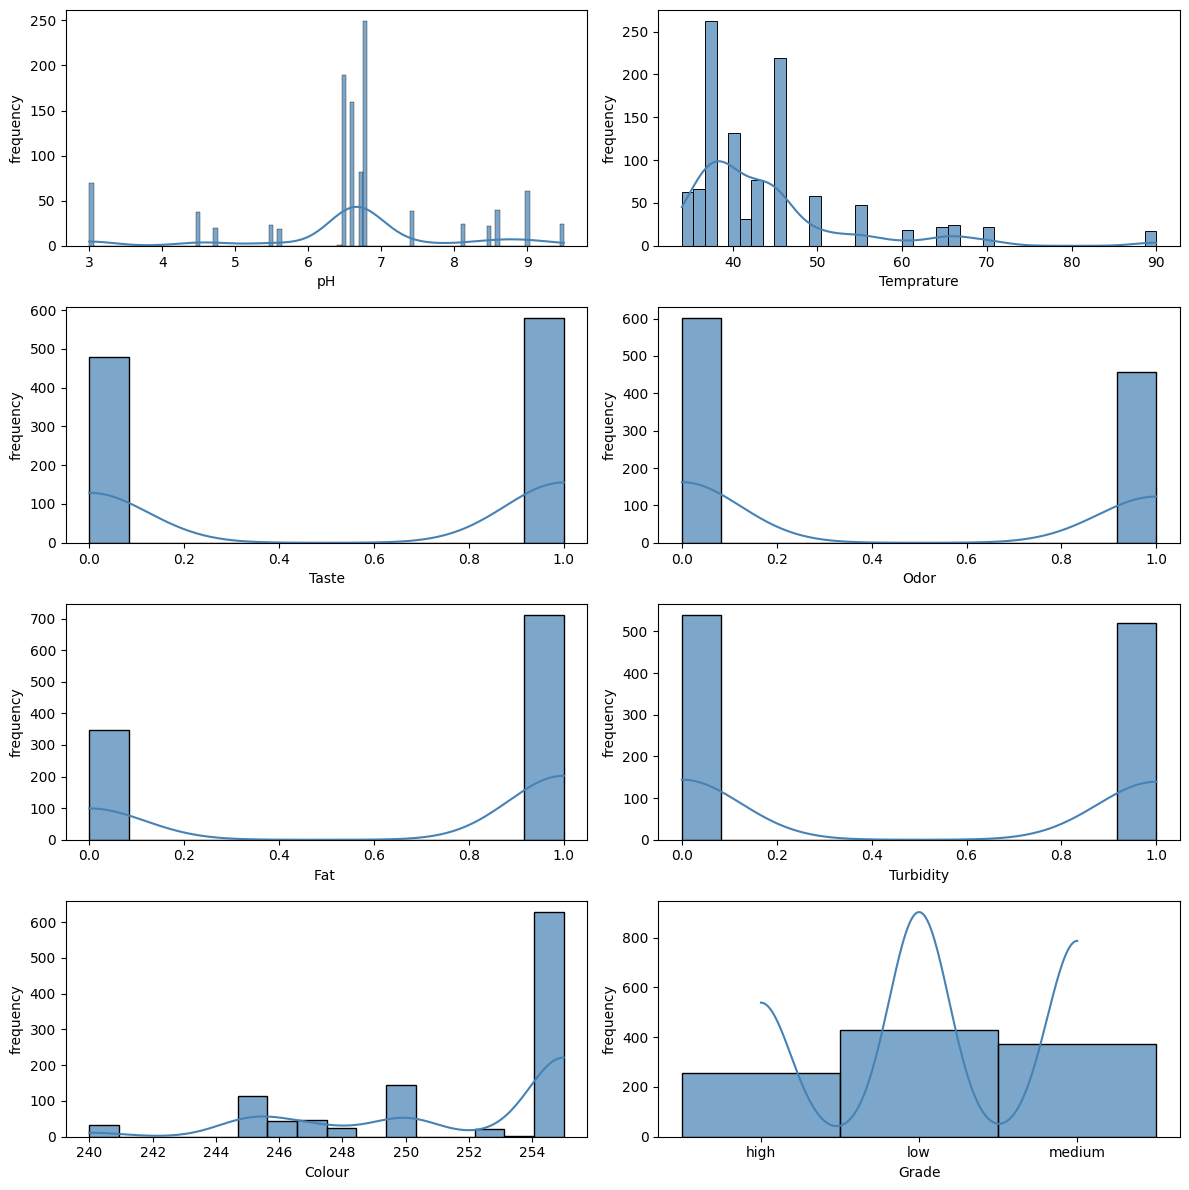

In [9]:
# define subplot
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

# column
columns = data.columns

# use looping
for i, ax in enumerate(axes.flatten()):
    if i < len(columns):
        # Membuat histogram
        sns.histplot(data=data, x=columns[i], kde=True, color='steelblue', alpha=0.7, ax=ax)
        ax.set_xlabel(columns[i])
        ax.set_ylabel('frequency')

# layout
plt.tight_layout()

# show plot
plt.show()

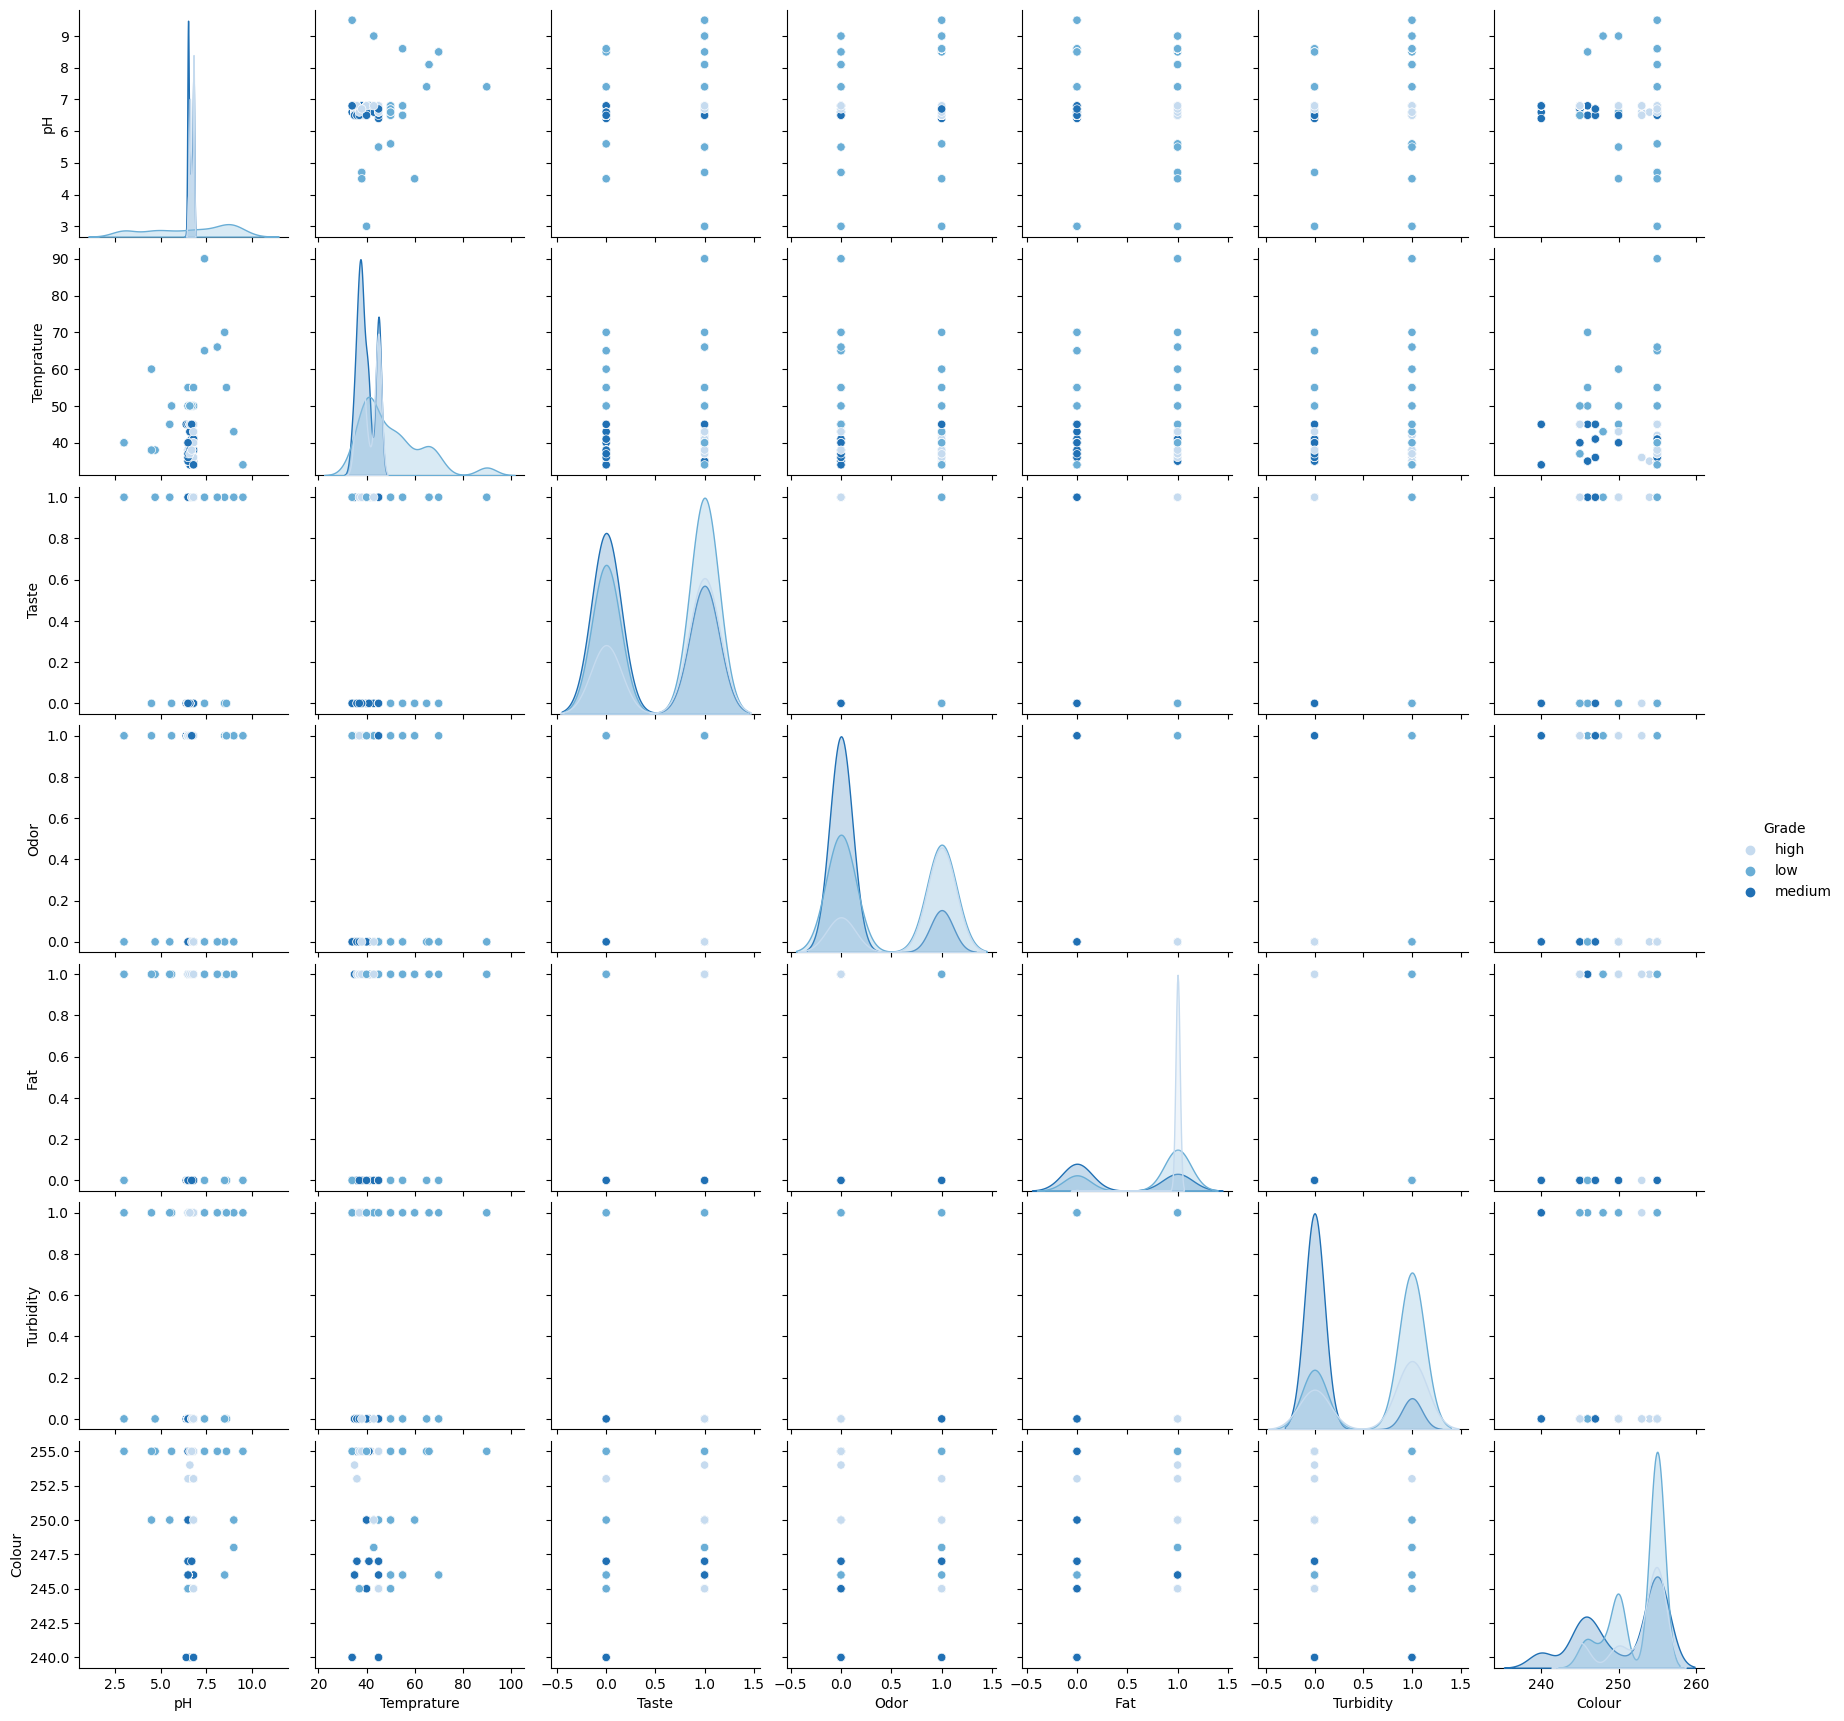

In [10]:
# Menampilkan scatterplot
sns.pairplot(data = data, hue = 'Grade', palette='Blues')

The histogram plot reveals a non-normal distribution, suggesting that the sampled milk's quality is not typically distributed. The scatter plot shows no significant correlation among the parameters measured, indicating that changes in one parameter do not consistently impact others

# **V. Feature Engineering**

## Data Cleaning

In [11]:
# rename column
data.rename({'Fat ' : 'Fat', 'Temprature' : 'Temperature'}, axis=1, inplace=True)

In [12]:
#replace data
data.replace({'low' : 0, 'medium' : 1, 'high' : 2}, inplace=True)

## Split Between X (Feature) dan Y (Target)

Membagi data kedalam variable `x` dan variable `y`

In [13]:
# Splitting between x dan y
X = data.drop(['Grade'], axis = 1)
y = data['Grade']

X.shape # Kolom Grade sudah tidak termasuk kedalam data

(1059, 7)

## Split Between Train-Set dan Test-Set

Membagi variable `x` dan `y` kedalan `train`-set dan `test`-set

In [14]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7,
                                                    stratify = y)

print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)
X_train

Train Size : (847, 7)
Test Size : (212, 7)


,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour
452,6.5,35,1,0,1,0,246
59,6.8,45,0,0,1,0,255
400,6.5,37,0,0,0,0,245
134,8.5,70,0,0,0,0,246
691,4.5,38,0,1,1,1,255
...,...,...,...,...,...,...,...
864,6.6,50,0,0,0,1,250
989,6.5,37,0,0,0,0,245
669,4.5,60,0,1,1,1,250
423,6.7,45,1,1,1,0,245


## Handling Cardinality

In this dataset, I did not handle cardinality.

## Pipeline

### Missing Values

In [15]:
# Check missing value
X_train.isnull().sum()

pH             0
Temperature    0
Taste          0
Odor           0
Fat            0
Turbidity      0
Colour         0
dtype: int64

In [16]:
# Check missing value
X_test.isnull().sum()

pH             0
Temperature    0
Taste          0
Odor           0
Fat            0
Turbidity      0
Colour         0
dtype: int64

### Outliers

In [17]:
# Check outliers
def diagnostic_plots(df):
    num_cols = len(df.columns)
    num_rows = (num_cols // 2) + (num_cols % 2)
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4*num_rows))
    
    for i, column in enumerate(df.columns):
        row = i // 2
        col = i % 2
        
        ax = axes[row, col]
        sns.boxplot(df[column], ax=ax)
        ax.set_title('Boxplot of ' + column)
        
        skewness = df[column].skew()
        ax.text(0.5, 0.95, f'Skewness: {skewness:.2f}', transform=ax.transAxes,
                horizontalalignment='center', verticalalignment='top',
                bbox={'boxstyle': 'round', 'facecolor': 'white', 'alpha': 0.8})
    
    plt.tight_layout()
    plt.show()


In [18]:
# reset_index
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

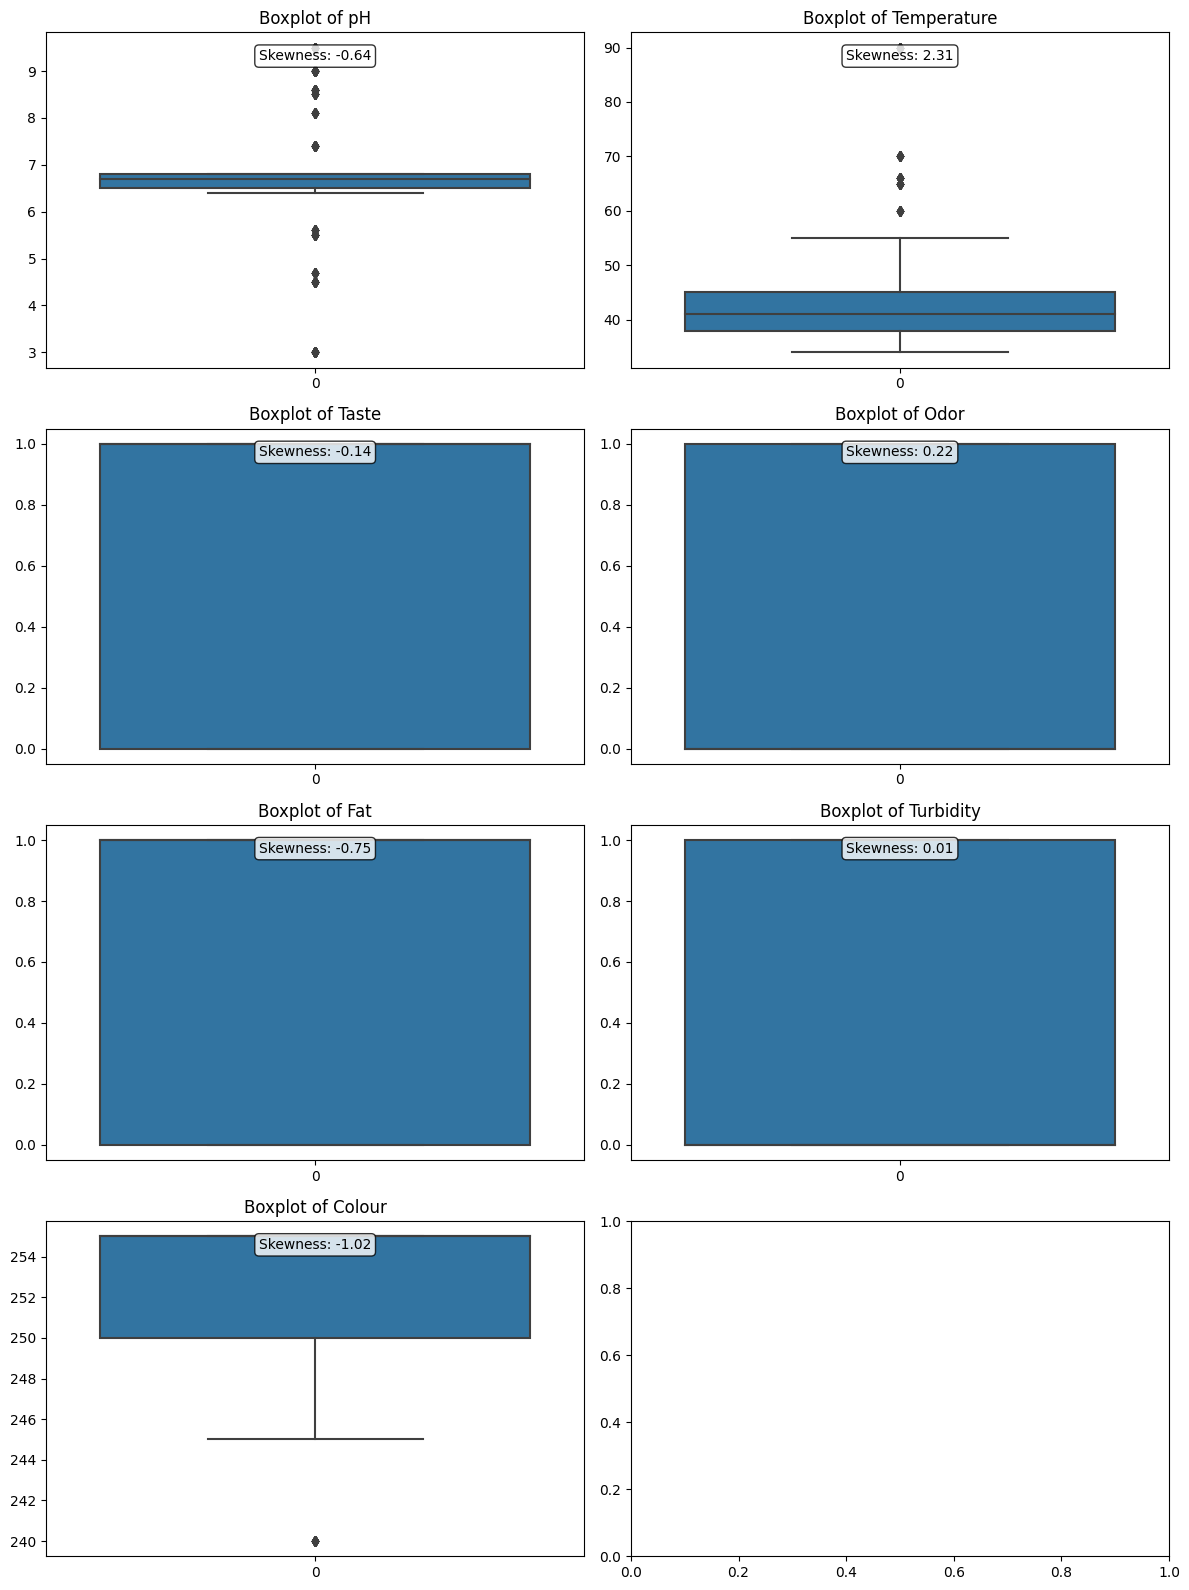

In [19]:
# Menampilkan boxplot
diagnostic_plots(X_train)


For handling outliers, I will use the capping method. Additionally, some of the data is relatively non-normally distributed.

### Building Pipeline

For the pipeline I am using, it is applied to the numeric columns as the category columns already have boolean values.

Perform outlier handling.

Perform scaling using MinMaxScaler since the data is not normally distributed.

In [20]:
# splitting list of clumn
num_columns_sc = ['pH', 'Temperature', 'Colour']
num_columns_nsc = ['Taste', 'Odor', 'Fat', 'Turbidity']

In [21]:
# define numpipeline
num_pipe = Pipeline([
                    ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
                    ('scaler', MinMaxScaler())])

In [22]:
# define column transformer
fe_pipeline = ColumnTransformer([('num_handling', num_pipe, num_columns_sc),
                                      ('non_handling', 'passthrough', num_columns_nsc)])
fe_pipeline

ColumnTransformer(transformers=[('num_handling',
                                 Pipeline(steps=[('outlier',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['pH', 'Temperature', 'Colour']),
                                ('non_handling', 'passthrough',
                                 ['Taste', 'Odor', 'Fat', 'Turbidity'])])

In [23]:
# Show data after using pipeline
X_train_final = fe_pipeline.fit_transform(X_train)
X_train_final

array([[0.375     , 0.04651163, 0.28      , ..., 0.        , 1.        ,
        0.        ],
       [0.625     , 0.51162791, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.375     , 0.13953488, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ],
       [0.54166667, 0.51162791, 0.2       , ..., 1.        , 1.        ,
        0.        ],
       [0.375     , 0.18604651, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [24]:
# create dataframe
X_train_final = pd.DataFrame(X_train_final, columns=['pH', 'Temperature', 'Colour', 'Taste', 'Odor', 'Fat', 'Turbidity'])

In [25]:
# show data after using pipeline
X_test_final = fe_pipeline.transform(X_test)
X_test_final

array([[0.375     , 0.13953488, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.375     , 0.09302326, 0.36      , ..., 0.        , 0.        ,
        0.        ],
       [0.45833333, 0.13953488, 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.45833333, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 1.        , 0.28      , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.41860465, 0.6       , ..., 0.        , 1.        ,
        1.        ]])

In [26]:
# create dataframe
X_test_final = pd.DataFrame(X_test_final, columns=['pH', 'Temperature', 'Colour', 'Taste', 'Odor', 'Fat', 'Turbidity'])

## Feature Selection

### Checking Correlation

#### Pearson

In [27]:
# Pearson
Xy_train = pd.concat([X_train_final, y_train], axis = 1)
Xy_corr = Xy_train.corr().Grade.sort_values(ascending = False)

In [28]:
# Menampilkan data korelasi diatas 0
print(Xy_corr[Xy_corr > 0])

Grade          1.000000
Colour         0.026560
Temperature    0.012768
Name: Grade, dtype: float64


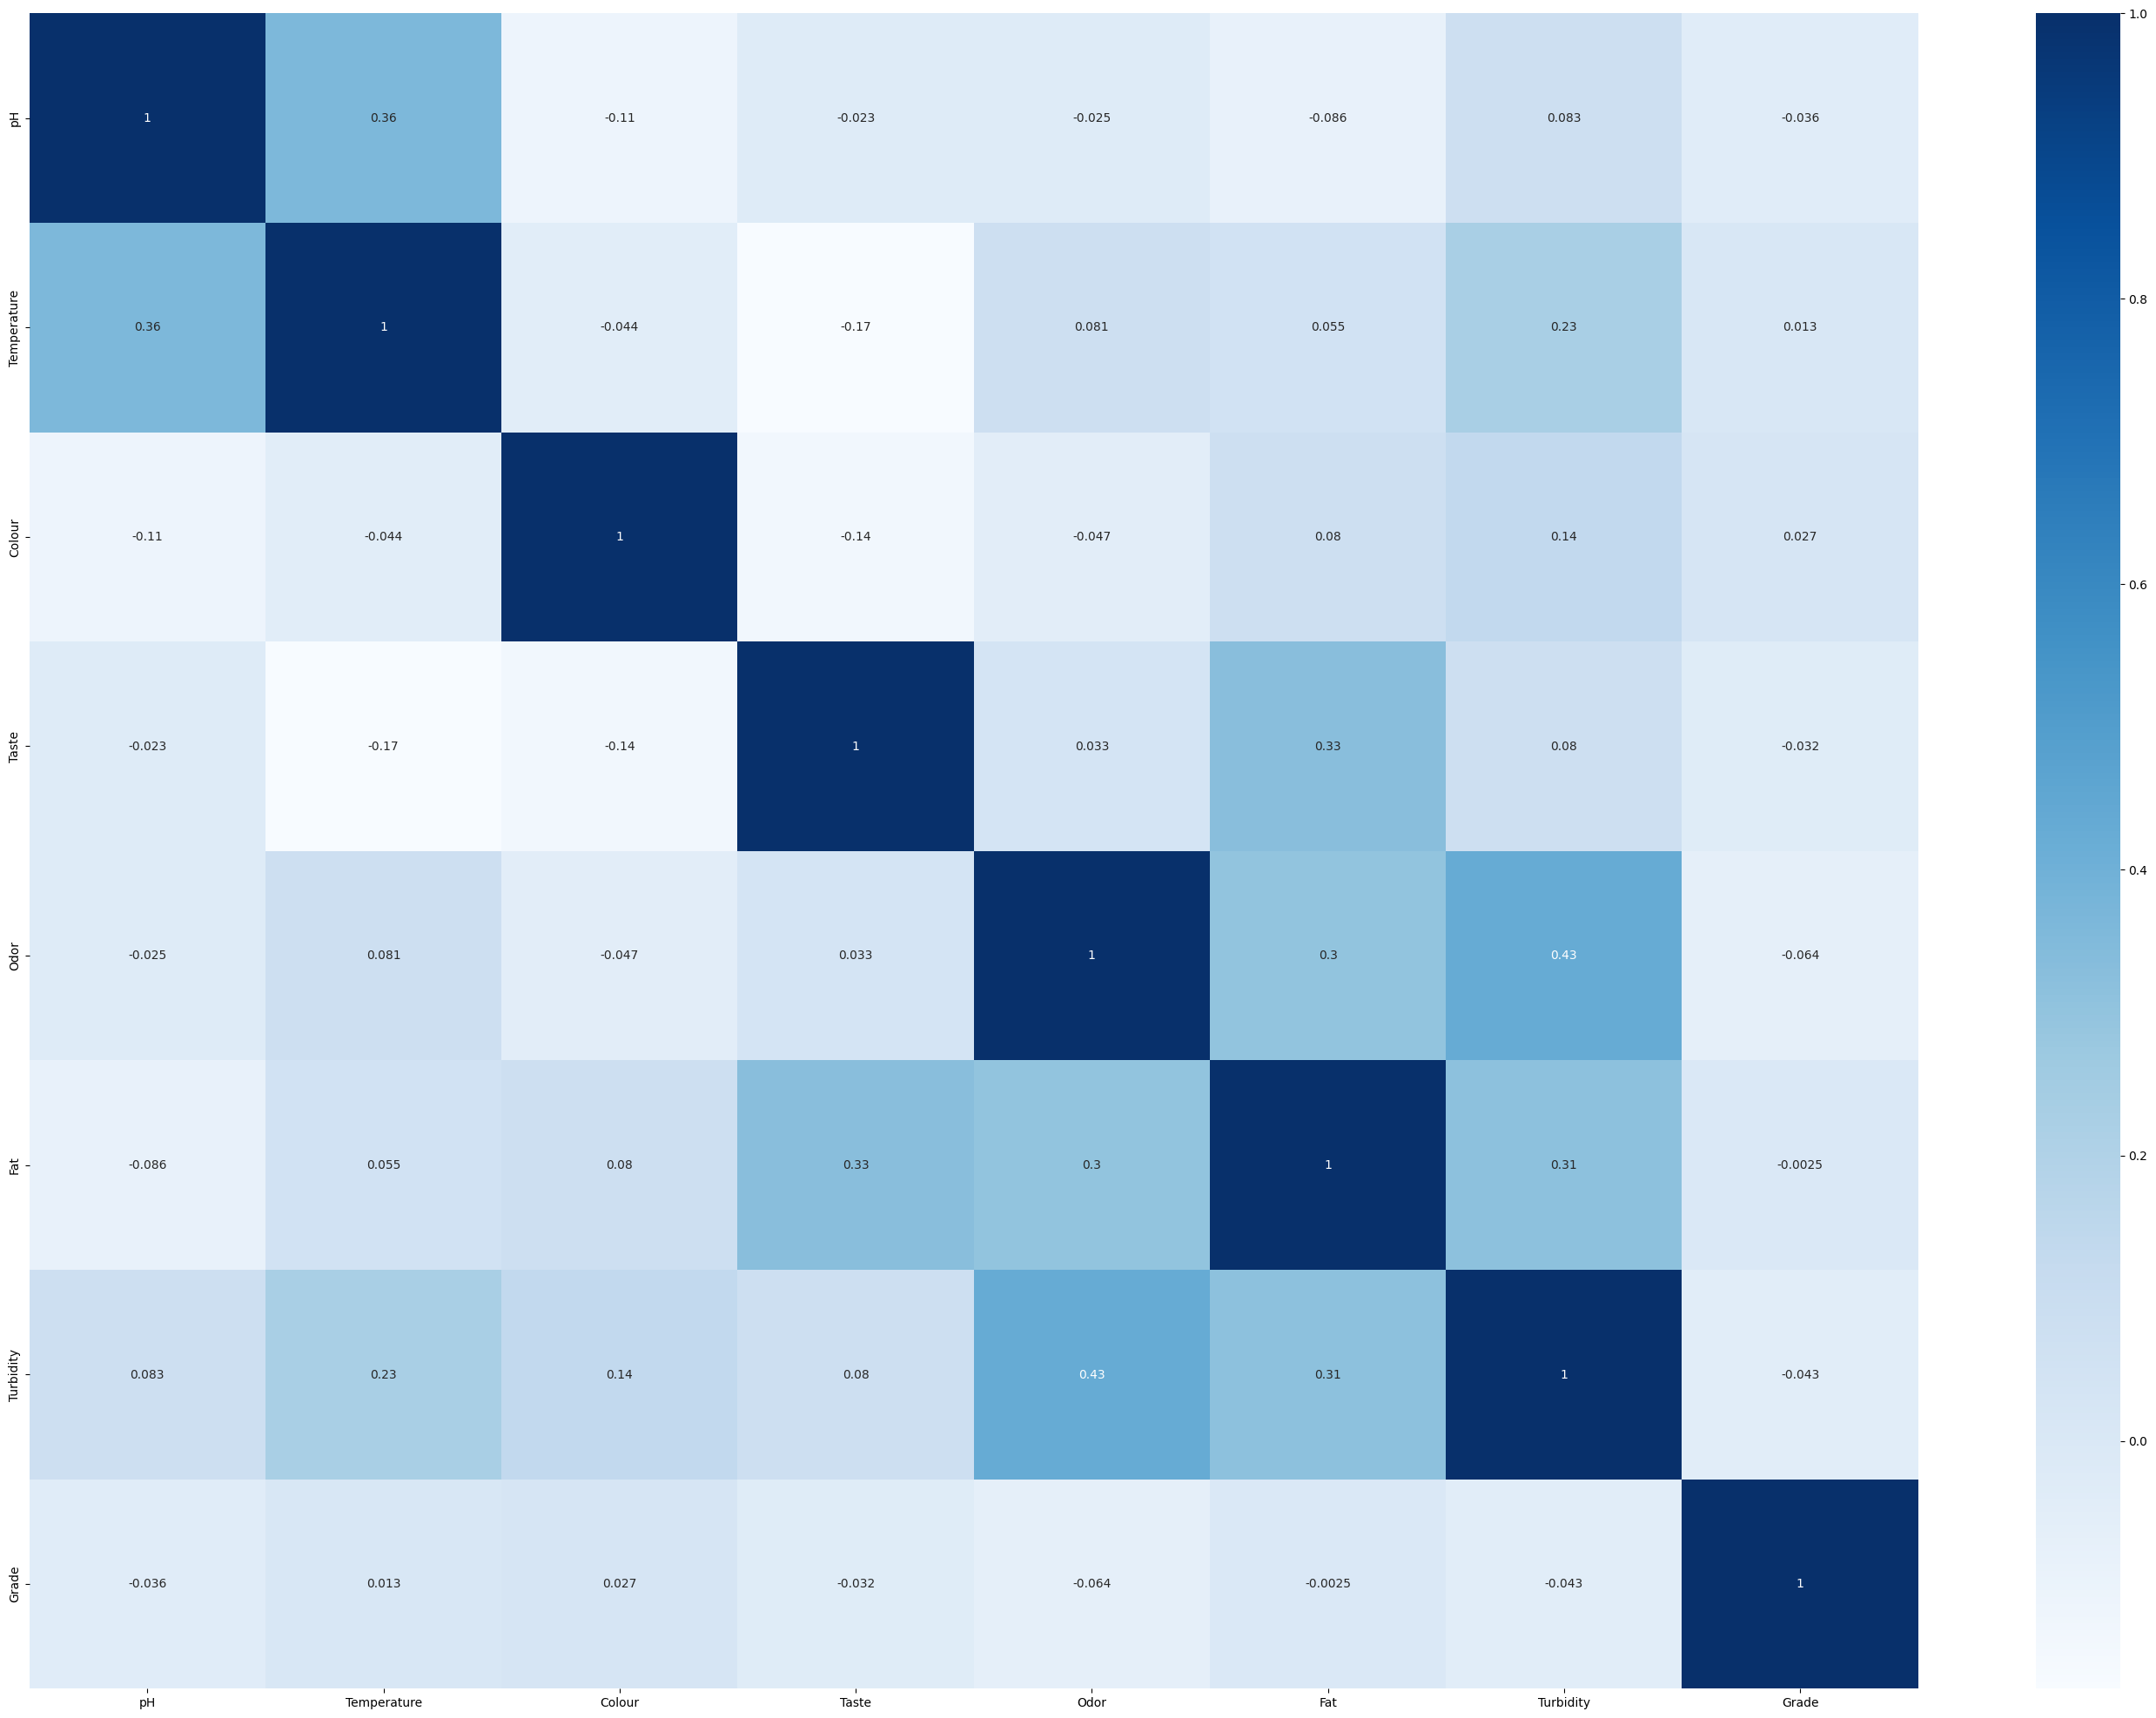

In [29]:
# Menampilkan Grafik Heat Map Korelasi pada Data Numerikal
f, ax = plt.subplots(1,1, figsize=(35,25))
ax = sns.heatmap(Xy_train.corr(), annot = True, cmap = 'Blues')


According to Pearson correlation, there is no significant correlation with the "Grade" column. However, there is observed correlation between "odor," "taste," and "turbidity," indicating they are correlated with each other. Additionally, there is correlation between temperature and pH.

#### Multicollinearity

In [30]:
# Membuat function untuk menghitung nilai VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X_train_final.columns
    vif["VIF"] = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [31]:
# Menampilkan nilai VIF
calc_vif(X_train_final)

,variables,VIF
5,Fat,4.014486
0,pH,3.845348
2,Colour,3.559701
1,Temperature,3.460877
6,Turbidity,2.746641
3,Taste,2.348209
4,Odor,2.256180


Based on the variance inflation factor (VIF) values for each feature, there is no evidence of multicollinearity.

### Chi2 Square

In [32]:
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X_train_final, y_train)

df_scores = pd.DataFrame({'Feature': X_train_final.columns,
                          'Score': selector.scores_,
                          'p-value': selector.pvalues_.round(4)})

df_scores = df_scores.sort_values(by='Score', ascending=False)

df_scores

,Feature,Score,p-value
6,Turbidity,133.156073,0.0000
4,Odor,99.584941,0.0000
5,Fat,66.399618,0.0000
1,Temperature,47.956038,0.0000
3,Taste,17.281076,0.0002
2,Colour,7.406900,0.0246
0,pH,1.781661,0.4103


Based on the chi-square test, the columns taste, turbidity, odor, and fat have correlations with the grade of the milk.

# **VI. Model Definition**

The models used for this task are Logistic Regression, SVM (Support Vector Machines), Decision Tree, Random Forest, KNN (K-Nearest Neighbors), Naive Bayes, CatBoost, and AdaBoost. These models are suitable for binary classification tasks

# **VII. Model Training**


I am using all columns for model training

## Modelling Using Pipeline

### Default Model

In [33]:
lr_model = LogisticRegression(random_state=7)
svc_model = SVC(random_state=7, probability=True)
dt_model = DecisionTreeClassifier(random_state=7)
rf_model = RandomForestClassifier(random_state=7)
ab_model = AdaBoostClassifier(random_state=7)
cat_model = CatBoostClassifier(random_state=7)

#### Logistic Regression

Train Set
ROC-AUC :  0.9321303061212598 

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       343
           1       0.84      0.90      0.87       299
           2       0.77      0.83      0.80       205

    accuracy                           0.83       847
   macro avg       0.82      0.83      0.82       847
weighted avg       0.83      0.83      0.83       847
 

Test Set
ROC-AUC :  0.9356143284187061 

              precision    recall  f1-score   support

           0       0.87      0.71      0.78        86
           1       0.78      0.91      0.84        75
           2       0.84      0.90      0.87        51

    accuracy                           0.83       212
   macro avg       0.83      0.84      0.83       212
weighted avg       0.83      0.83      0.82       212

Confusion Matrix      : 


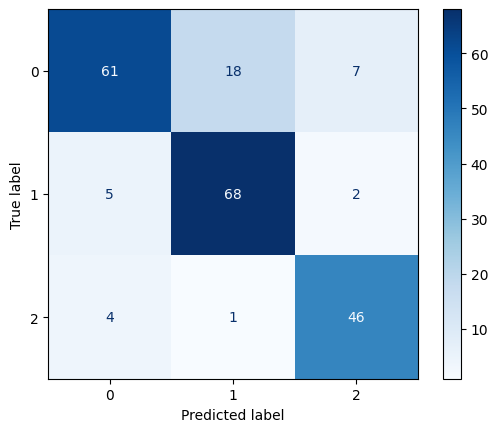

In [34]:
lr_process = Pipeline([('preprocess', fe_pipeline),
                    ('classification', lr_model)])

lr_process.fit(X_train, y_train)
lr_train = lr_process.predict(X_train)
lr_tprob = lr_process.predict_proba(X_train)
lr_test = lr_process.predict(X_test)
lr_prob = lr_process.predict_proba(X_test)

print('Train Set')
print('ROC-AUC : ', roc_auc_score(y_train, lr_tprob, multi_class='ovo'), '\n')
print(classification_report(y_train, lr_train), '\n')
print('Test Set')
print('ROC-AUC : ', roc_auc_score(y_test, lr_prob, multi_class='ovo'), '\n')
print(classification_report(y_test, lr_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(lr_process, X_test, y_test, cmap='Blues'))

#### Support Vector Machine

Train Set
ROC-AUC :  0.9969375665850225 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       343
           1       0.93      0.94      0.93       299
           2       0.90      0.92      0.91       205

    accuracy                           0.95       847
   macro avg       0.94      0.94      0.94       847
weighted avg       0.95      0.95      0.95       847
 

Test Set
ROC-AUC :  0.9981405482089477 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        86
           1       0.96      0.93      0.95        75
           2       0.92      0.96      0.94        51

    accuracy                           0.96       212
   macro avg       0.96      0.96      0.96       212
weighted avg       0.96      0.96      0.96       212

Confusion Matrix      : 


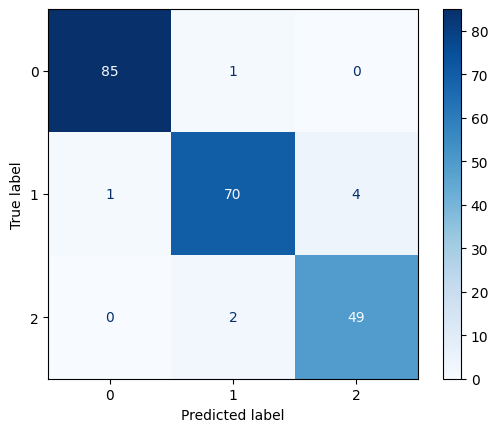

In [35]:
svc_process = Pipeline([('preprocess', fe_pipeline),
                       ('classification', svc_model)])

svc_process.fit(X_train, y_train)
svc_train = svc_process.predict(X_train)
svc_tprob = svc_process.predict_proba(X_train)
svc_test = svc_process.predict(X_test)
svc_prob = svc_process.predict_proba(X_test)

print('Train Set')
print('ROC-AUC : ', roc_auc_score(y_train, svc_tprob, multi_class='ovo'), '\n')
print(classification_report(y_train, svc_train), '\n')
print('Test Set')
print('ROC-AUC : ', roc_auc_score(y_test, svc_prob, multi_class='ovo'), '\n')
print(classification_report(y_test, svc_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svc_process, X_test, y_test, cmap='Blues'))

#### Decision Tree

Train Set
ROC-AUC :  1.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       343
           1       1.00      1.00      1.00       299
           2       1.00      1.00      1.00       205

    accuracy                           1.00       847
   macro avg       1.00      1.00      1.00       847
weighted avg       1.00      1.00      1.00       847
 

Test Set
ROC-AUC :  0.9950980392156863 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       0.99      1.00      0.99        75
           2       1.00      0.98      0.99        51

    accuracy                           1.00       212
   macro avg       1.00      0.99      0.99       212
weighted avg       1.00      1.00      1.00       212

Confusion Matrix      : 


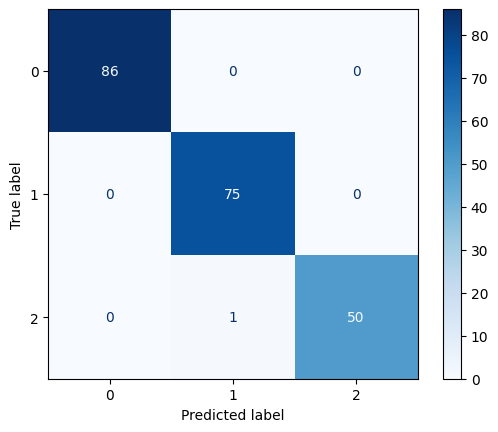

In [36]:
dt_process = Pipeline([('preprocess', fe_pipeline),
                       ('classification', dt_model)])

dt_process.fit(X_train, y_train)
dt_train = dt_process.predict(X_train)
dt_tprob = dt_process.predict_proba(X_train)
dt_test = dt_process.predict(X_test)
dt_prob = dt_process.predict_proba(X_test)

print('Train Set')
print('ROC-AUC : ', roc_auc_score(y_train, dt_tprob, multi_class='ovo'), '\n')
print(classification_report(y_train, dt_train), '\n')
print('Test Set')
print('ROC-AUC : ', roc_auc_score(y_test, dt_prob, multi_class='ovo'), '\n')
print(classification_report(y_test, dt_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt_process, X_test, y_test, cmap='Blues'))

#### Random Forest

Train Set
ROC-AUC :  1.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       343
           1       1.00      1.00      1.00       299
           2       1.00      1.00      1.00       205

    accuracy                           1.00       847
   macro avg       1.00      1.00      1.00       847
weighted avg       1.00      1.00      1.00       847
 

Test Set
ROC-AUC :  1.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       0.99      1.00      0.99        75
           2       1.00      0.98      0.99        51

    accuracy                           1.00       212
   macro avg       1.00      0.99      0.99       212
weighted avg       1.00      1.00      1.00       212

Confusion Matrix      : 


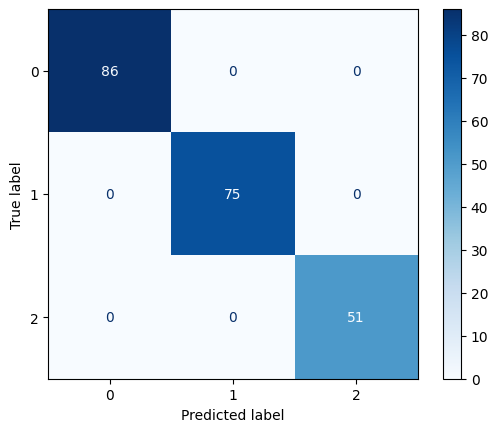

In [37]:
rf_process = Pipeline([('preprocess', fe_pipeline),
                       ('classification', rf_model)])

rf_process.fit(X_train, y_train)
rf_train = rf_process.predict(X_train)
rf_tprob = rf_process.predict_proba(X_train)
rf_test = rf_process.predict(X_test)
rf_prob = rf_process.predict_proba(X_test)

print('Train Set')
print('ROC-AUC : ', roc_auc_score(y_train, rf_tprob, multi_class='ovo'), '\n')
print(classification_report(y_train, rf_train), '\n')
print('Test Set')
print('ROC-AUC : ', roc_auc_score(y_test, rf_prob, multi_class='ovo'), '\n')
print(classification_report(y_test, dt_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_process, X_test, y_test, cmap='Blues'))

#### AdaBoost

Train Set
ROC-AUC :  0.9874983897512951 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       343
           1       0.88      0.94      0.91       299
           2       0.91      0.81      0.86       205

    accuracy                           0.94       847
   macro avg       0.93      0.92      0.92       847
weighted avg       0.94      0.94      0.93       847
 

Test Set
ROC-AUC :  0.9881045751633987 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       0.82      0.97      0.89        75
           2       0.95      0.69      0.80        51

    accuracy                           0.92       212
   macro avg       0.92      0.89      0.90       212
weighted avg       0.92      0.92      0.91       212

Confusion Matrix      : 


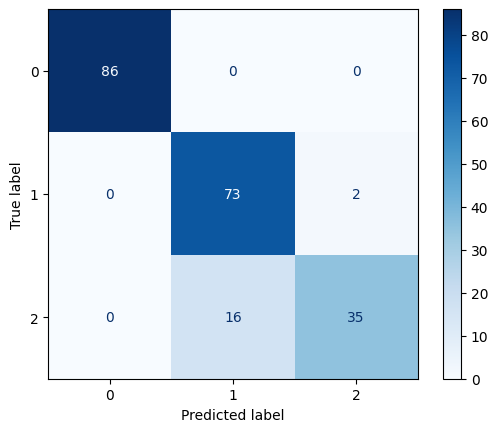

In [38]:
ab_process = Pipeline([('preprocess', fe_pipeline),
                       ('classification', ab_model)])

ab_process.fit(X_train, y_train)
ab_train = ab_process.predict(X_train)
ab_tprob = ab_process.predict_proba(X_train)
ab_test = ab_process.predict(X_test)
ab_prob = ab_process.predict_proba(X_test)

print('Train Set')
print('ROC-AUC : ', roc_auc_score(y_train, ab_tprob, multi_class='ovo'), '\n')
print(classification_report(y_train, ab_train), '\n')
print('Test Set')
print('ROC-AUC : ', roc_auc_score(y_test, ab_prob, multi_class='ovo'), '\n')
print(classification_report(y_test, ab_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(ab_process, X_test, y_test, cmap='Blues'))

#### CatBoost

Learning rate set to 0.078459
0:	learn: 1.0032222	total: 127ms	remaining: 2m 6s
1:	learn: 0.9146949	total: 128ms	remaining: 1m 3s
2:	learn: 0.8371774	total: 128ms	remaining: 42.7s
3:	learn: 0.7700727	total: 129ms	remaining: 32.2s
4:	learn: 0.7124741	total: 130ms	remaining: 25.9s
5:	learn: 0.6624699	total: 131ms	remaining: 21.7s
6:	learn: 0.6173800	total: 132ms	remaining: 18.8s
7:	learn: 0.5780076	total: 133ms	remaining: 16.5s
8:	learn: 0.5378216	total: 134ms	remaining: 14.7s
9:	learn: 0.5052932	total: 135ms	remaining: 13.3s
10:	learn: 0.4763685	total: 135ms	remaining: 12.2s
11:	learn: 0.4474460	total: 137ms	remaining: 11.2s
12:	learn: 0.4242511	total: 137ms	remaining: 10.4s
13:	learn: 0.4020551	total: 138ms	remaining: 9.74s
14:	learn: 0.3825941	total: 139ms	remaining: 9.14s
15:	learn: 0.3622270	total: 140ms	remaining: 8.62s
16:	learn: 0.3463930	total: 141ms	remaining: 8.16s
17:	learn: 0.3303937	total: 142ms	remaining: 7.75s
18:	learn: 0.3153179	total: 143ms	remaining: 7.37s
19:	learn: 

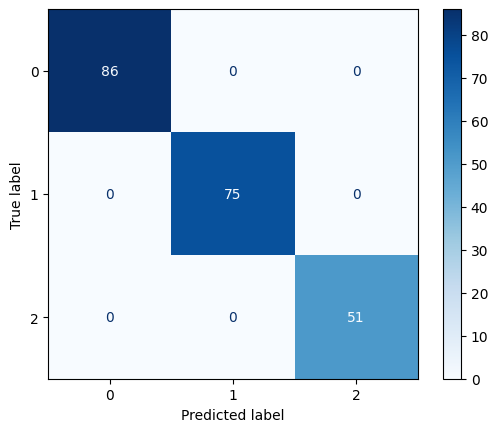

In [39]:
cat_process = Pipeline([('preprocess', fe_pipeline),
                       ('classification', cat_model)])

cat_process.fit(X_train, y_train)
cat_train = cat_process.predict(X_train)
cat_tprob = cat_process.predict_proba(X_train)
cat_test = cat_process.predict(X_test)
cat_prob = cat_process.predict_proba(X_test)

print('Train Set')
print('ROC-AUC : ', roc_auc_score(y_train, cat_tprob, multi_class='ovo'), '\n')
print(classification_report(y_train, cat_train), '\n')
print('Test Set')
print('ROC-AUC : ', roc_auc_score(y_test, cat_prob, multi_class='ovo'), '\n')
print(classification_report(y_test, cat_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(cat_process, X_test, y_test, cmap='Blues'))

Feature Importance

In [40]:
# Menghitung feature importance
feature_importance = cat_model.feature_importances_

sorted_indices = np.argsort(feature_importance)[::-1]

# Menampilkan feature importance dalam urutan menurun
for i in sorted_indices:
    feature_name = X_train.columns[i]
    importance = feature_importance[i]
    print(f"Feature: {feature_name}, Importance: {importance}")

Feature: pH, Importance: 43.24571244496327
Feature: Temperature, Importance: 14.27123515446783
Feature: Fat, Importance: 11.351050956864137
Feature: Turbidity, Importance: 9.446561875202498
Feature: Colour, Importance: 8.39301023899118
Feature: Odor, Importance: 6.980444301701359
Feature: Taste, Importance: 6.311985027809724


Based on the six models mentioned above, it can be observed that CatBoost performs the best, as it has the highest values for precision, recall, F1-score, and ROC-AUC.

All columns contribute positively to the milk quality, with the highest contribution coming from the pH value.

# **VIII. Model Evaluation**

In [41]:
# Membuat dataframe base model
all_reports = {}
score_reports = {
    'test - precision' : precision_score(y_test, cat_test, average='macro'),
    'test - recall' : recall_score(y_test, cat_test, average='macro'),
    'test - accuracy_score' : accuracy_score(y_test, cat_test),
    'test - f1_score' : f1_score(y_test, cat_test,average='macro')
}
all_reports['Default Model'] = score_reports
pd.DataFrame(all_reports)

,Default Model
test - accuracy_score,1.0
test - f1_score,1.0
test - precision,1.0
test - recall,1.0


## Hyperparameter Tunning


I used GridSearchCV for hyperparameter tuning

In [42]:
# Menentukan grid_parameter
grid_parameters = {'classification__bagging_temperature' : [0.0, 0.1], 'classification__learning_rate' : [0.2, 0.4, 0.6, 0.8, 1.0],
                   'classification__n_estimators' : [1, 5, 10, 50, 100, 500], 'classification__random_state' : [7]}

# Gunakan gridsearch
grid = GridSearchCV(cat_process, grid_parameters, verbose = 0, refit = True, scoring = 'accuracy',
                    cv = 5, return_train_score = True, n_jobs = 1)
grid.fit(X_train, y_train)

0:	learn: 0.8770867	total: 1.1ms	remaining: 0us
0:	learn: 0.8621436	total: 987us	remaining: 0us
0:	learn: 0.8775367	total: 1.1ms	remaining: 0us
0:	learn: 0.8790733	total: 921us	remaining: 0us
0:	learn: 0.8719219	total: 1.04ms	remaining: 0us
0:	learn: 0.8770867	total: 916us	remaining: 3.67ms
1:	learn: 0.7181827	total: 1.86ms	remaining: 2.79ms
2:	learn: 0.6068623	total: 2.71ms	remaining: 1.81ms
3:	learn: 0.5101203	total: 3.5ms	remaining: 876us
4:	learn: 0.4403368	total: 4.32ms	remaining: 0us
0:	learn: 0.8621436	total: 1.11ms	remaining: 4.45ms
1:	learn: 0.7095505	total: 2.1ms	remaining: 3.15ms
2:	learn: 0.5974683	total: 2.94ms	remaining: 1.96ms
3:	learn: 0.5027153	total: 3.84ms	remaining: 959us
4:	learn: 0.4255647	total: 4.73ms	remaining: 0us
0:	learn: 0.8775367	total: 865us	remaining: 3.46ms
1:	learn: 0.7260031	total: 2.11ms	remaining: 3.16ms
2:	learn: 0.6260398	total: 3.01ms	remaining: 2.01ms
3:	learn: 0.5198352	total: 4.24ms	remaining: 1.06ms
4:	learn: 0.4468436	total: 5.31ms	remaining

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num_handling',
                                                                         Pipeline(steps=[('outlier',
                                                                                          Winsorizer(capping_method='iqr',
                                                                                                     fold=1.5,
                                                                                                     tail='both')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['pH',
                                                                          'Temperature',
                                                                          'Colour']),
                                                                        ('non_handling',
                                                                         'passthrough',
                                                                         ['Taste',
                                                                          'Odor',
                                                                          'Fat',
                                                                          'Turbidity'])])),
                                       ('classification',
                                        <catboost.core.CatBoostClassifier object at 0x000002022D61D0D0>)]),
             n_jobs=1,
             param_grid={'classification__bagging_temperature': [0.0, 0.1],
                         'classification__learning_rate': [0.2, 0.4, 0.6, 0.8,
                                                           1.0],
                         'classification__n_estimators': [1, 5, 10, 50, 100,
                                                          500],
                         'classification__random_state': [7]},
             return_train_score=True, scoring='accuracy')

In [43]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_index_)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_handling',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['pH', 'Temperature',
                                                   'Colour']),
                                                 ('non_handling', 'passthrough',
                                                  ['Taste', 'Odor', 'Fat',
                                                   'Turbidity'])])),
                ('cla

In [44]:
# Menggunakan best parameter
best_cat = CatBoostClassifier(bagging_temperature = 0.1, learning_rate = 1.0, n_estimators = 10, random_state = 7)

In [45]:
best_cat_process = Pipeline([('preprocess', fe_pipeline),
                       ('classification', best_cat)])

best_cat_process.fit(X_train, y_train)
bc_test = best_cat_process.predict(X_test)
bc_prob = best_cat_process.predict_proba(X_test)

print('Test Set')
print('ROC-AUC : ', roc_auc_score(y_test, bc_prob, multi_class='ovo'), '\n')
print(classification_report(y_test, bc_test))

0:	learn: 0.3702459	total: 1.18ms	remaining: 10.7ms
1:	learn: 0.1772721	total: 2.5ms	remaining: 9.98ms
2:	learn: 0.1061357	total: 3.54ms	remaining: 8.25ms
3:	learn: 0.0726934	total: 4.51ms	remaining: 6.77ms
4:	learn: 0.0510368	total: 5.53ms	remaining: 5.53ms
5:	learn: 0.0364594	total: 6.61ms	remaining: 4.41ms
6:	learn: 0.0305490	total: 7.73ms	remaining: 3.31ms
7:	learn: 0.0255019	total: 8.97ms	remaining: 2.24ms
8:	learn: 0.0217468	total: 10.2ms	remaining: 1.13ms
9:	learn: 0.0175949	total: 11.3ms	remaining: 0us
Test Set
ROC-AUC :  1.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       0.99      1.00      0.99        75
           2       1.00      0.98      0.99        51

    accuracy                           1.00       212
   macro avg       1.00      0.99      0.99       212
weighted avg       1.00      1.00      1.00       212



In [46]:
# Save Classification Report into a Dictionary
score_reports = {
    'test - precision' : precision_score(y_test, bc_test, average='macro'),
    'test - recall' : recall_score(y_test, bc_test, average='macro'),
    'test - accuracy_score' : accuracy_score(y_test, bc_test),
    'test - f1_score' : f1_score(y_test, bc_test, average='macro'),
}
all_reports['Grid Search'] = score_reports
pd.DataFrame(all_reports)

,Default Model,Grid Search
test - precision,1.0,0.995614
test - recall,1.0,0.993464
test - accuracy_score,1.0,0.995283
test - f1_score,1.0,0.994492



After tuning, it was found that the results experienced a decrease. Therefore, I have chosen the CatBoost model with default parameters. It is observed that the CatBoost model is a good fit for the data. 

The metric I focused on is precision, which measures the rate of falsely predicting milk as high grade when it is actually of low or moderate grade. This means that any prediction errors in this metric have the potential to create a negative image for the company after the milk is marketed

# **IX. Model Saving**

In [47]:
# Save File

# Modelling
with open('cat_model.pkl', 'wb') as file_1:
    pickle.dump(cat_model, file_1)

with open('cat_process.pkl', 'wb') as file_2:
    pickle.dump(cat_process, file_2)
    
# Pre-processing
with open('fe_pipeline.pkl', 'wb') as file_3:
    pickle.dump(fe_pipeline, file_3)
    
# List Numeric & Category
with open('num_cols_sc.txt', 'w') as file_4:
    json.dump(num_columns_sc, file_4)

with open('num_cols_nsc.txt', 'w') as file_5:
    json.dump(num_columns_nsc, file_5)

# **X. Model Inferencing**

## Load Model

In [48]:
# Load Model

# Modelling
with open('cat_model.pkl', 'rb') as file_1:
    cat_model = pickle.load(file_1)

with open('cat_process.pkl', 'rb') as file_2:
    cat_process = pickle.load(file_2)

# Pre-processing
with open('fe_pipeline.pkl', 'rb') as file_3:
    fe_pipeline = pickle.load(file_3)
    
# List Numeric & Category
with open('num_cols_sc.txt', 'r') as file_4:
    num_cols_sc = json.load(file_4)
    
with open('num_cols_nsc.txt', 'r') as file_5:
    num_cols_nsc = json.load(file_5)

## Inferencing

In [49]:
# Membuat data inference
df_inf = data.sample(n = 50)
df_inf = df_inf.drop(['Grade'], axis=1)
df_inf

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour
120,6.6,45,0,0,0,1,250
533,6.8,41,0,0,0,0,255
1002,6.5,38,1,0,0,0,255
552,6.8,43,1,0,1,0,250
989,6.5,37,0,0,0,0,245
52,4.5,60,0,1,1,1,250
487,6.5,55,1,0,1,0,246
223,4.7,38,1,0,1,0,255
530,6.8,45,0,1,1,1,255
866,6.6,38,0,0,0,0,255


Feature Enginering

In [50]:
df_final = fe_pipeline.transform(df_inf)

Modelling

In [51]:
y_pred_inf = cat_process.predict(df_inf)
y_pred_inf

array([[1],
       [1],
       [1],
       [2],
       [1],
       [0],
       [0],
       [0],
       [2],
       [1],
       [0],
       [1],
       [0],
       [2],
       [2],
       [2],
       [0],
       [1],
       [0],
       [2],
       [0],
       [2],
       [2],
       [2],
       [0],
       [2],
       [1],
       [1],
       [2],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [0],
       [0],
       [0],
       [1]], dtype=int64)

# **XI. Kesimpulan**

**Exploratory Data Analysis** :


- Based on the provided information, PT. Susu Jaya Abadi's milk production currently falls short, with 40% of the samples being of low quality, 35% moderate, and only 25% high quality. To improve production, the product management team can focus on optimizing certain parameters: pH, temperature, color, odor, fat, taste, and turbidity.

- For milk of medium-good quality, it should have a pH between 6.5 and 7.0, a temperature above 35 and less than or equal to 50. Any values outside this range would indicate low-quality milk. Additionally, the milk's color should be at 255.

- To achieve good-quality milk, the team should consider factors such as fat content, odor, taste, and turbidity.

- By optimizing the production process based on these parameters and implementing a monitoring system, PT. Susu Jaya Abadi can aim to consistently produce high-grade milk. This approach will ensure that the company delivers milk products of superior quality and enhances customer satisfaction.

- The histogram plot reveals a non-normal distribution, suggesting that the sampled milk's quality is not typically distributed. The scatter plot shows no significant correlation among the parameters measured, indicating that changes in one parameter do not consistently impact others

**Model Analysis** :

- Based on the six models mentioned above, it can be observed that CatBoost performs the best, as it has the highest values for precision, recall, F1-score, and ROC-AUC.

- All columns contribute positively to the milk quality, with the highest contribution coming from the pH value.

- After tuning, it was found that the results experienced a decrease. Therefore, I have chosen the CatBoost model with default parameters. It is observed that the CatBoost model is a good fit for the data. 

- The metric I focused on is precision, which measures the rate of falsely predicting milk as high grade when it is actually of low or moderate grade. This means that any prediction errors in this metric have the potential to create a negative image for the company after the milk is marketed

**Insight** :

- PT. Susu Jaya Abadi can optimize the process of milk produce

- PT. Susu Jaya Abadi can implement a monitoring system to control the quality of the product

- For the model, we can develop model prediction and the product management team can add more features to increase the prediction 